In [31]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [32]:
ds = pd.read_csv("./mnist_train.csv")

In [33]:
data = ds.values[:10000, 1:]
y = ds.values[:10000, 0]
print (data.shape)

(10000, 784)


/home/gautam/.local/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


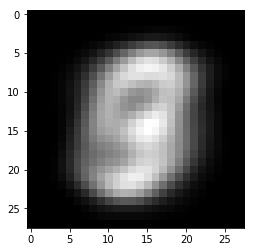

In [34]:
N = 1200
plt.grid("off")
plt.imshow(data[:].mean(axis=0).astype(np.uint8).reshape((28, 28)), cmap='gray')

In [35]:
split = int(0.8*data.shape[0])
X_train = data[:]
y_train = y[:]

print(X_train.shape, y_train.shape)


(10000, 784) (10000,)


In [36]:
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train)


In [37]:
X_train = Variable(X_train, requires_grad=True).type(torch.FloatTensor) 
y_train = Variable(y_train).type(torch.LongTensor) 

In [38]:
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)  
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output) 

    def forward(self, x):
        x = F.relu(self.hidden1(x))  
        x = F.relu(self.hidden2(x)) 
        x = self.out(x)
        return x

In [39]:
net = Net(n_feature=784, n_hidden1=16, n_hidden2=16, n_output=10)     # define the network
print(net)  # net architecture

optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
loss_func = torch.nn.CrossEntropyLoss()

Net(
  (hidden1): Linear(in_features=784, out_features=16, bias=True)
  (hidden2): Linear(in_features=16, out_features=16, bias=True)
  (out): Linear(in_features=16, out_features=10, bias=True)
)


In [40]:
for t in range(100):
    out = net(X_train)                 # input x and predict based on x
    loss = loss_func(out, y_train)     # must be (1. nn output, 2. target), the target label is NOT one-hotted

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

In [41]:
prediction = torch.max(out, 1)[1]
pred_y = prediction.data.numpy().squeeze()

In [42]:
target_y = y_train.data.numpy()

In [43]:
score = (target_y==pred_y).sum()/target_y.shape[0]

In [44]:
score

0.6971

In [30]:
torch.max(out, 1)[1]

tensor([ 1,  1,  4,  ...,  1,  7,  7])